<a href="https://colab.research.google.com/github/vmfrois/linear-regression-profit-forecast/blob/master/profit_forecast_ice_cream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema

- Base de dados:
  - Input (X): Temperatura
  - Output (Y): Lucro diário em dólares

# Etapa 1: Importação das bibliotecas

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.17.0'

# Etapa 2: Importação da base de dados

In [ ]:
# Leitura do arquivo csv
profit_df = pd.read_csv('/content/SalesData.csv')

In [ ]:
# Visualização de todos os registros
profit_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [ ]:
# Visualização dos 5 primeiros registros
profit_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
# Visualização dos 10 últimos registros
profit_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [ ]:
# Visualização de informações da base de dados
profit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
# Descrição da base de dados
profit_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# Etapa 3: Visualização da base de dados

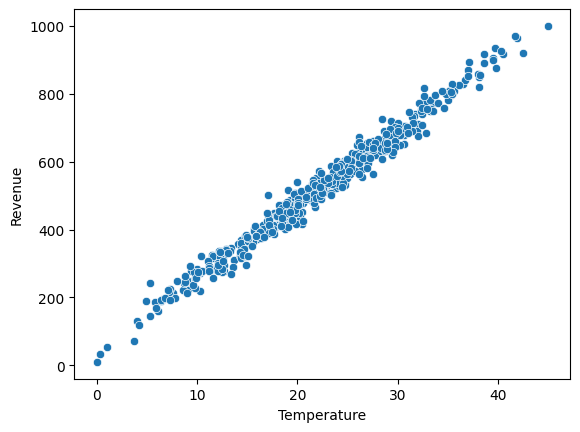

In [ ]:
# Scatter plot do Seborn
sns.scatterplot(x=profit_df['Temperature'], y=profit_df['Revenue']);

# Etapa 4: Criação das variáveis da base de dados

In [ ]:
# Criação das variáveis X_train e y_train
X_train = profit_df['Temperature']
y_train = profit_df['Revenue']

In [ ]:
# Formato da variável X_train
X_train.shape

(500,)

In [ ]:
# Formato da variável y_train
y_train.shape

(500,)

# Etapa 5: Criação e construção do modelo

In [ ]:
#tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
tf.__version__

'2.17.0'

In [ ]:
# Construção do modelo sequencial
model = Sequential()

In [ ]:
# Sumário do modelo
model.add(Dense(units=10, input_shape=[1]))
model.add(Dense(units=1))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilar o modelo
model.compile(optimizer=Adam(0.1), loss='mean_squared_error')

In [ ]:
# Treinamento
epochs = model.fit(x=X_train, y=y_train, epochs = 1000)

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 168728.5781
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20245.5762 
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2868.3074  
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1034.4521  
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 728.4651 
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 640.2399  
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 697.4877 
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 678.0937 
Epoch 9/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 673.7299 
Epoch 10/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 712.4353 
Epoch 11/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 696.4437 
Epoch 12/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 612.5295 
Epoch 13/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 690.4072 
Epoch 14/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 680.1310 
Epoch

# Etapa 6: Avaliação do modelo

In [ ]:
# Visualização do dicionário com os resultados
epochs.history.keys()

dict_keys(['loss'])

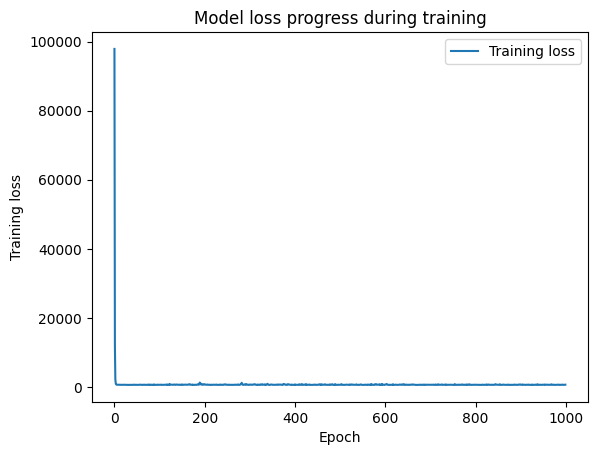

In [ ]:
# Gráfico com os resultados da loss function
plt.plot(epochs.history['loss'])

plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss']);

In [ ]:
# Visualização dos pesos
model.get_weights()

[array([[-0.03438931, -2.1768262 , -0.02627332,  4.05162   ,  0.05214643,
         -0.12164183, -0.01471893,  0.05102791,  0.02145112, -0.07610518]],
       dtype=float32),
 array([ 0.70481527, -4.073579  ,  0.541449  ,  5.8766007 , -0.9347141 ,
        -0.47983482,  0.16489989, -0.9021024 , -0.22007744,  1.8947815 ],
       dtype=float32),
 array([[ 4.5032948e-03],
        [-2.2392020e+00],
        [ 3.4376446e-03],
        [ 4.1329288e+00],
        [ 1.0271670e-03],
        [ 1.7790459e-01],
        [ 6.2699718e-03],
        [ 1.7317731e-03],
        [-7.5911428e-04],
        [ 3.7740115e-03]], dtype=float32),
 array([11.700111], dtype=float32)]

In [ ]:
# Previsões com o modelo treinado, com a temperatura de 5 graus
temperature = 5
pred = model.predict(np.array([temperature]))
print('Revenue Predictions Using Trained ANN =', pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Revenue Predictions Using Trained ANN = [[153.02115]]


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


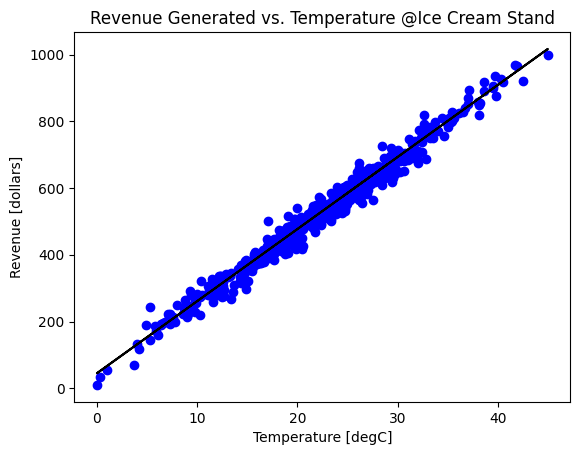

In [ ]:
# Gráfico com a reta da regressão linear
y_pred = model.predict(X_train)
plt.scatter(X_train, y_train, color ='b')
plt.plot(X_train, y_pred, color ='k')

plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');

# Etapa 7: Confirmar os resultados usando sklearn

In [ ]:
# Usar o sklearn para obter os mesmos resultados
X_train.shape

(500,)

In [ ]:
X_train = X_train.values.reshape(-1,1)

In [ ]:
X_train.shape

(500, 1)

In [ ]:
y_train = y_train.values.reshape(-1, 1)

In [ ]:
y_train.shape

(500, 1)

In [ ]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
regr.coef_

array([[21.44362551]])

In [ ]:
regr.intercept_

array([44.83126709])

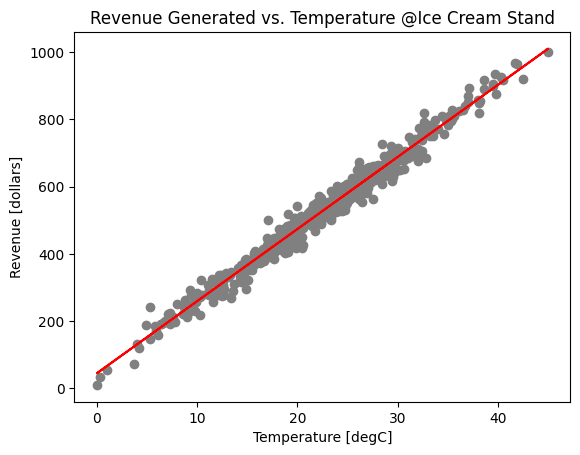

In [ ]:
y_pred = regr.predict(X_train)

plt.scatter(X_train, y_train, color='gray')

plt.plot(X_train, y_pred, color='red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');

In [ ]:
temp = 5
revenue = regr.predict([[temp]])
print('Revenue Predictions Using Trained ANN =', revenue)

Revenue Predictions Using Trained ANN = [[152.04939464]]
